In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,joblib
import re 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#df=pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/farmer.csv')
#df.head()

In [3]:
#df.to_csv('farmer.csv',index=False)

In [4]:
df=pd.read_csv('C:\\Users\\Pareta\\Desktop\\farmer_guider\\farmer.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
group=df.groupby('label')

In [9]:
group[['temperature']].mean()

,temperature
label,
apple,22.630942
banana,27.376798
blackgram,29.973340
chickpea,18.872847
coconut,27.409892
coffee,25.540477
cotton,23.988958
grapes,23.849575
jute,24.958376


In [10]:
group[['humidity']].mean()

,humidity
label,
apple,92.333383
banana,80.358123
blackgram,65.118426
chickpea,16.860439
coconut,94.844272
coffee,58.869846
cotton,79.843474
grapes,81.875228
jute,79.639864


In [11]:
df['label'].nunique

<bound method IndexOpsMixin.nunique of 0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object>

In [12]:
nitrogen=group['N'].agg(min_nitro='min',max_nitro='max',avg_nitro='mean')
nitrogen

,min_nitro,max_nitro,avg_nitro
label,,,
apple,0,40,20.80
banana,80,120,100.23
blackgram,20,60,40.02
chickpea,20,60,40.09
coconut,0,40,21.98
coffee,80,120,101.20
cotton,100,140,117.77
grapes,0,40,23.18
jute,60,100,78.40


In [13]:
nitrogen.reset_index(inplace=True)

In [14]:
nitrogen

,label,min_nitro,max_nitro,avg_nitro
0,apple,0,40,20.80
1,banana,80,120,100.23
2,blackgram,20,60,40.02
3,chickpea,20,60,40.09
4,coconut,0,40,21.98
5,coffee,80,120,101.20
6,cotton,100,140,117.77
7,grapes,0,40,23.18
8,jute,60,100,78.40
9,kidneybeans,0,40,20.75


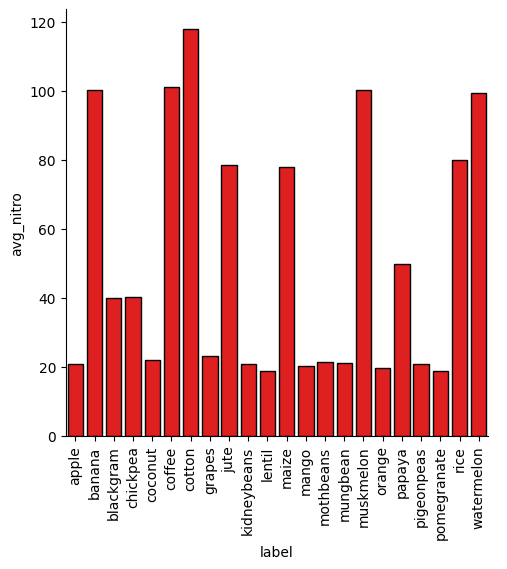

In [15]:
sns.catplot(x='label',y='avg_nitro',data=nitrogen,kind='bar',ec='k',color='r')
plt.xticks(rotation=90)
plt.show()

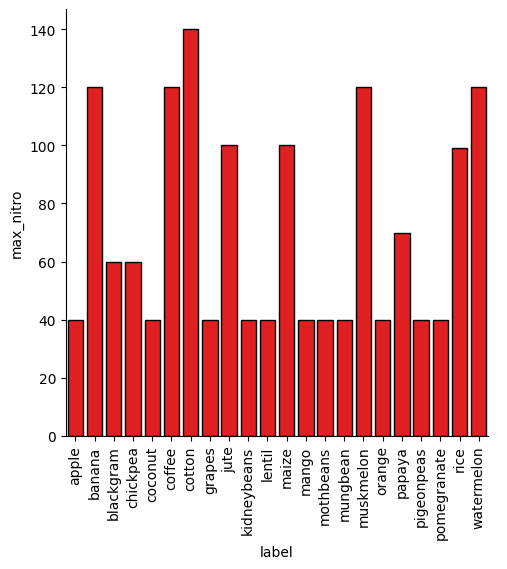

In [16]:
sns.catplot(x='label',y='max_nitro',data=nitrogen,kind='bar',ec='k',color='r')
plt.xticks(rotation=90)
plt.show()

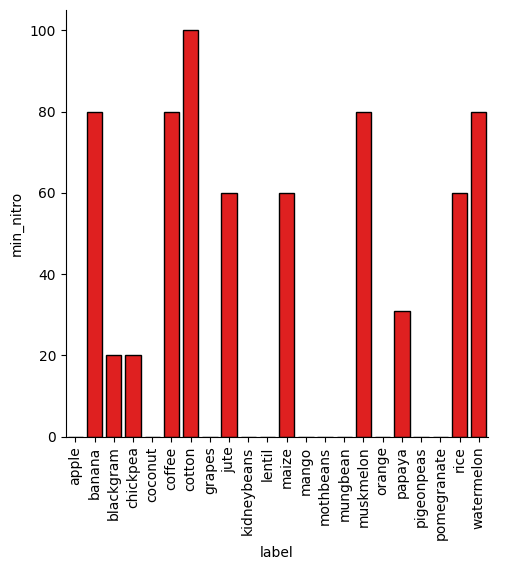

In [17]:
sns.catplot(x='label',y='min_nitro',data=nitrogen,kind='bar',ec='k',color='r')
plt.xticks(rotation=90)
plt.show()

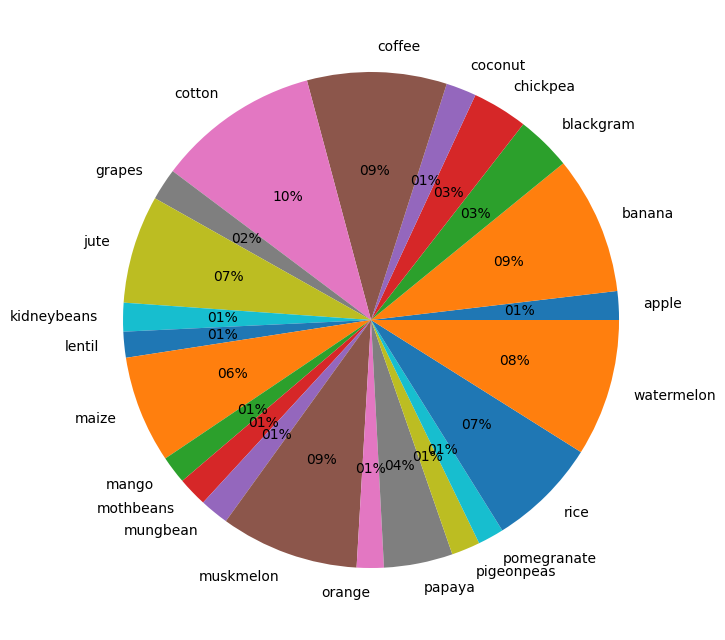

In [18]:
crops_label=list(nitrogen['label'])
avg_nitrogen=list(nitrogen['avg_nitro'])
plt.figure(figsize=(8,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct="%2.2d%%")
plt.show()

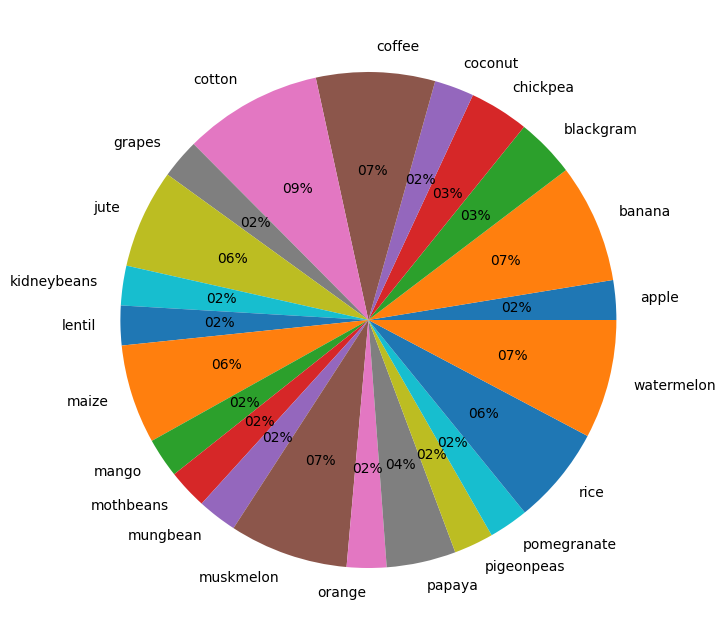

In [19]:
crops_label=list(nitrogen['label'])
avg_nitrogen=list(nitrogen['max_nitro'])
plt.figure(figsize=(8,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct="%2.2d%%")
plt.show()

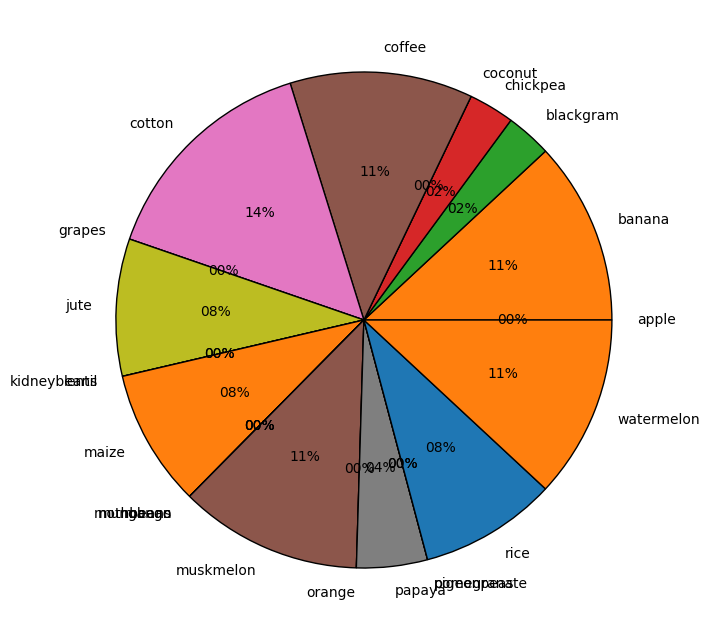

In [20]:
crops_label=list(nitrogen['label'])
avg_nitrogen=list(nitrogen['min_nitro'])
plt.figure(figsize=(8,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct="%2.2d%%",wedgeprops={'ec':'k'})
plt.show()

In [21]:
temp=group['temperature'].agg(min_temp='min',max_temp='max',avg_temp='mean')
temp

,min_temp,max_temp,avg_temp
label,,,
apple,21.036527,23.996862,22.630942
banana,25.010185,29.908885,27.376798
blackgram,25.097374,34.946616,29.973340
chickpea,17.024985,20.995022,18.872847
coconut,25.008724,29.869083,27.409892
coffee,23.059519,27.923744,25.540477
cotton,22.000851,25.992374,23.988958
grapes,8.825675,41.948657,23.849575
jute,23.094338,26.985822,24.958376


In [22]:
temp.reset_index(inplace=True)

In [23]:
temp

,label,min_temp,max_temp,avg_temp
0,apple,21.036527,23.996862,22.630942
1,banana,25.010185,29.908885,27.376798
2,blackgram,25.097374,34.946616,29.973340
3,chickpea,17.024985,20.995022,18.872847
4,coconut,25.008724,29.869083,27.409892
5,coffee,23.059519,27.923744,25.540477
6,cotton,22.000851,25.992374,23.988958
7,grapes,8.825675,41.948657,23.849575
8,jute,23.094338,26.985822,24.958376
9,kidneybeans,15.330426,24.923601,20.115085


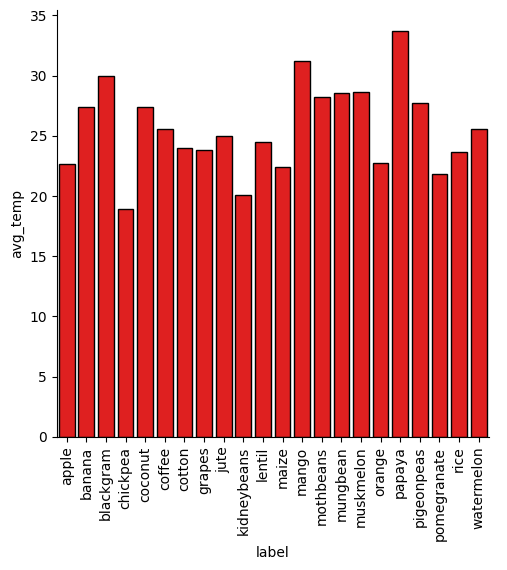

In [24]:
sns.catplot(x='label',y='avg_temp',data=temp,kind='bar',ec='k',color='r')
plt.xticks(rotation=90)
plt.show()

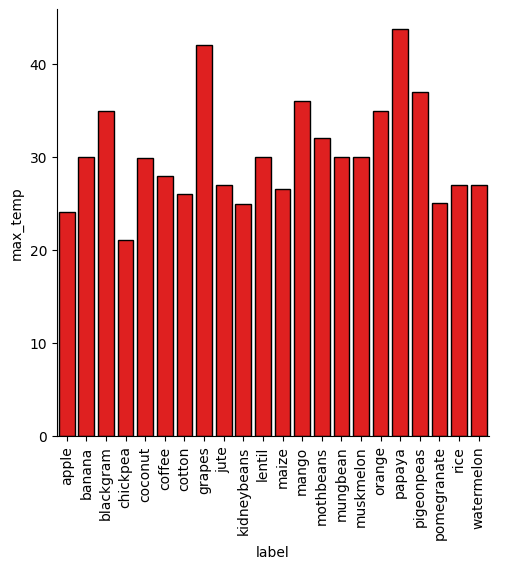

In [25]:
sns.catplot(x='label',y='max_temp',data=temp,kind='bar',ec='k',color='r')
plt.xticks(rotation=90)
plt.show()

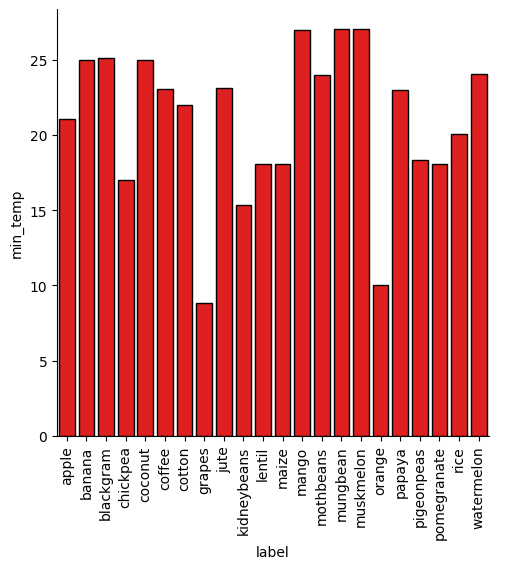

In [26]:
sns.catplot(x='label',y='min_temp',data=temp,kind='bar',ec='k',color='r')
plt.xticks(rotation=90)
plt.show()

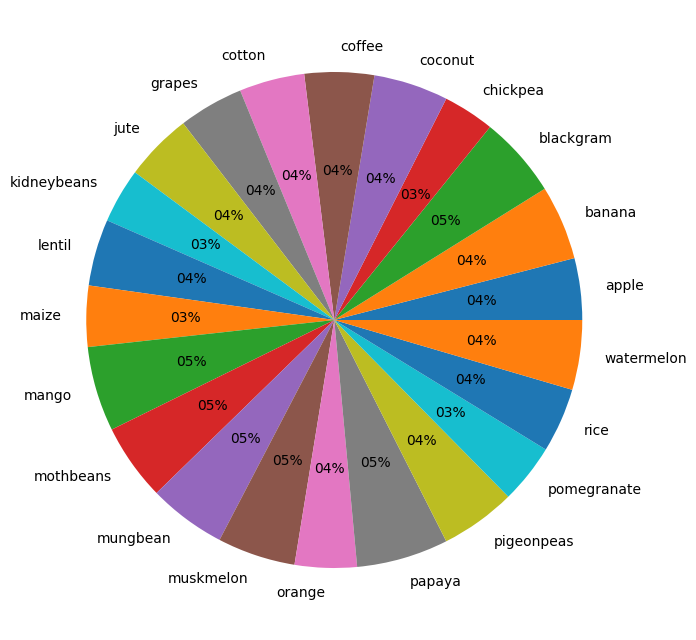

In [27]:
crops_label=list(temp['label'])
avg_temp=list(temp['avg_temp'])
plt.figure(figsize=(8,24))
plt.pie(avg_temp,labels=crops_label,autopct="%2.2d%%")
plt.show()

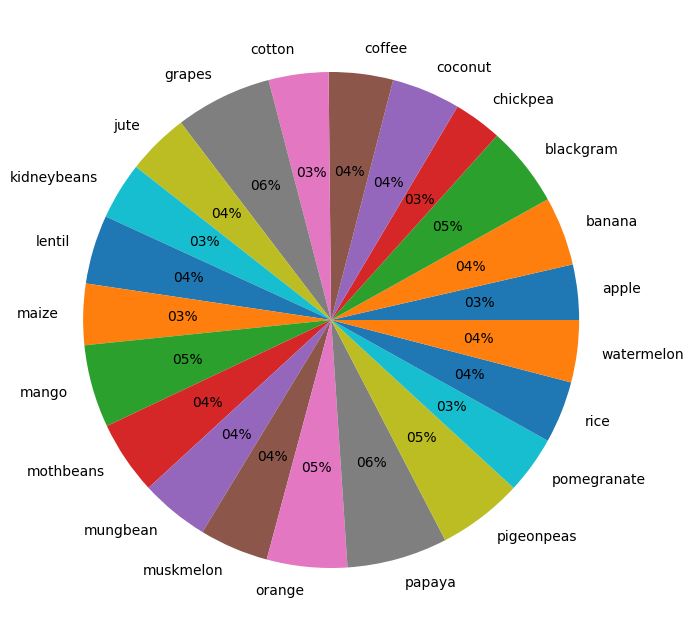

In [28]:
crops_label=list(temp['label'])
max_temp=list(temp['max_temp'])
plt.figure(figsize=(8,24))
plt.pie(max_temp,labels=crops_label,autopct="%2.2d%%")
plt.show()

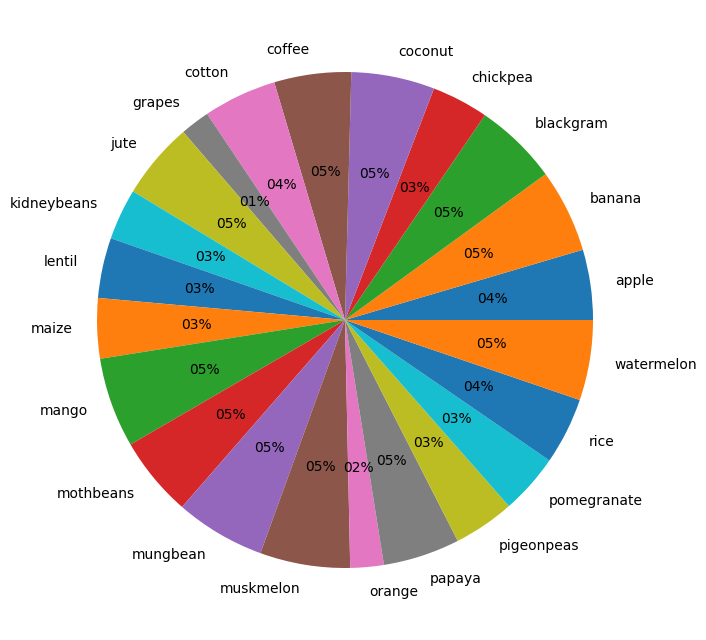

In [29]:
crops_label=list(temp['label'])
min_temp=list(temp['min_temp'])
plt.figure(figsize=(8,24))
plt.pie(min_temp,labels=crops_label,autopct="%2.2d%%")
plt.show()

In [30]:
rain=group['rainfall'].agg(min_rain='min',max_rain='max',avg_rain='mean')
rain

,min_rain,max_rain,avg_rain
label,,,
apple,100.117344,124.983162,112.654779
banana,90.109781,119.847970,104.626980
blackgram,60.417903,74.915595,67.884151
chickpea,65.113656,94.781896,80.058977
coconut,131.090008,225.632366,175.686646
coffee,115.156401,199.473564,158.066295
cotton,60.653817,99.931008,80.398043
grapes,65.010953,74.915062,69.611829
jute,150.235524,199.836291,174.792798


In [31]:
rain.reset_index(inplace=True)

In [32]:
rain

,label,min_rain,max_rain,avg_rain
0,apple,100.117344,124.983162,112.654779
1,banana,90.109781,119.847970,104.626980
2,blackgram,60.417903,74.915595,67.884151
3,chickpea,65.113656,94.781896,80.058977
4,coconut,131.090008,225.632366,175.686646
5,coffee,115.156401,199.473564,158.066295
6,cotton,60.653817,99.931008,80.398043
7,grapes,65.010953,74.915062,69.611829
8,jute,150.235524,199.836291,174.792798
9,kidneybeans,60.275525,149.744103,105.919778


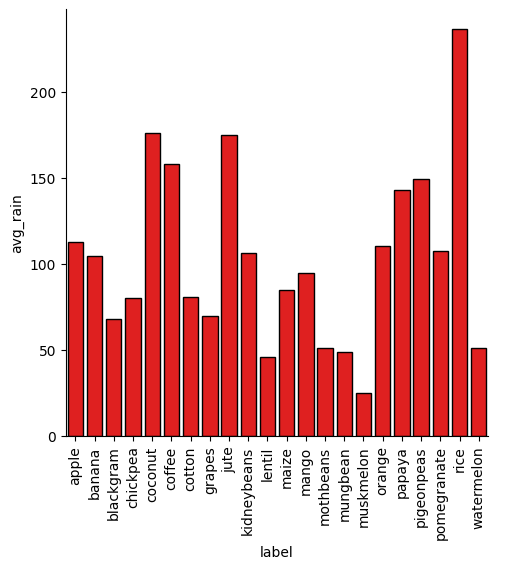

In [33]:
sns.catplot(x='label',y='avg_rain',data=rain,kind='bar',ec='k',color='r')
plt.xticks(rotation=90)
plt.show()

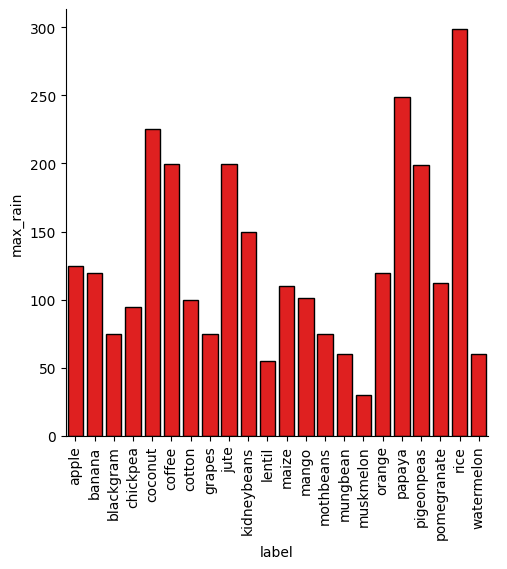

In [34]:
sns.catplot(x='label',y='max_rain',data=rain,kind='bar',ec='k',color='r')
plt.xticks(rotation=90)
plt.show()

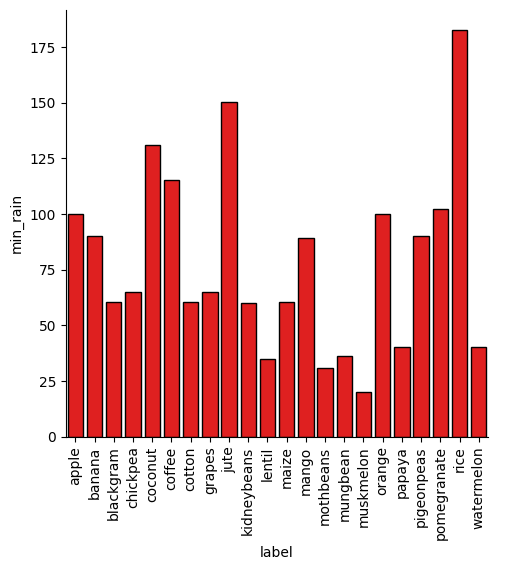

In [35]:
sns.catplot(x='label',y='min_rain',data=rain,kind='bar',ec='k',color='r')
plt.xticks(rotation=90)
plt.show()

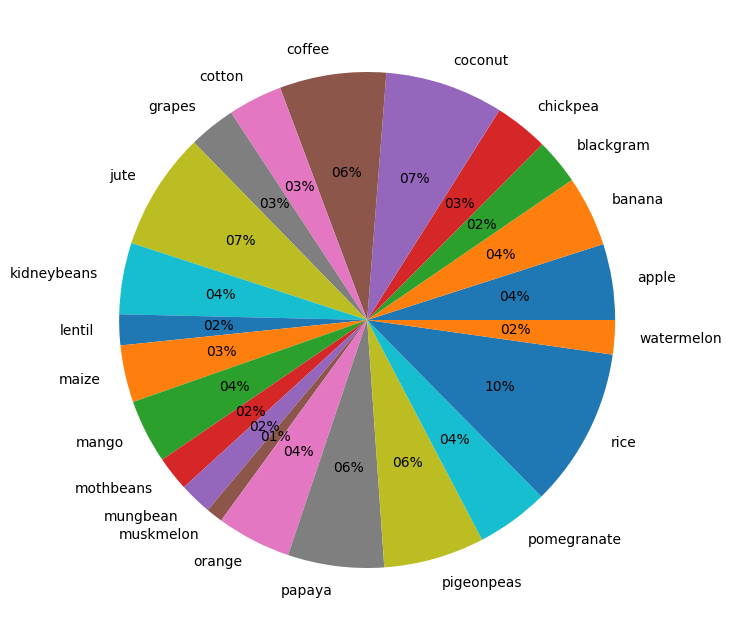

In [36]:
crops_label=list(rain['label'])
avg_rain=list(rain['avg_rain'])
plt.figure(figsize=(8,24))
plt.pie(avg_rain,labels=crops_label,autopct="%2.2d%%")
plt.show()

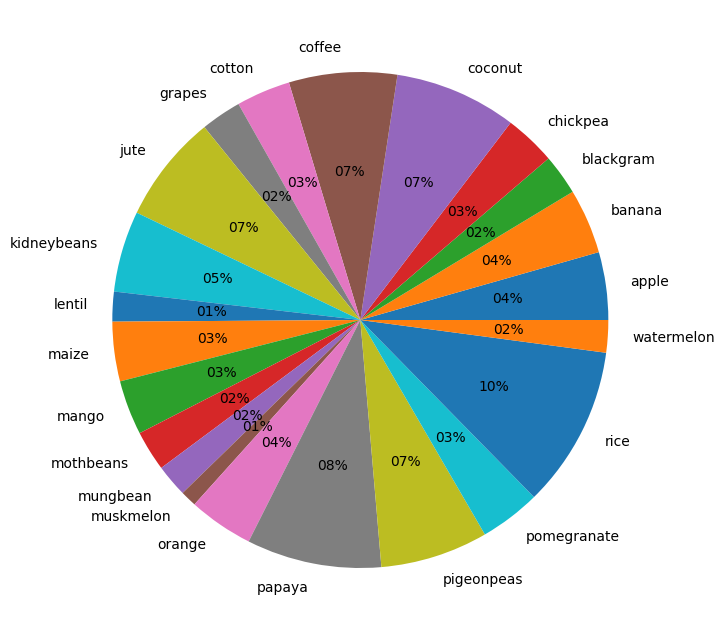

In [37]:
crops_label=list(rain['label'])
max_rain=list(rain['max_rain'])
plt.figure(figsize=(8,24))
plt.pie(max_rain,labels=crops_label,autopct="%2.2d%%")
plt.show()

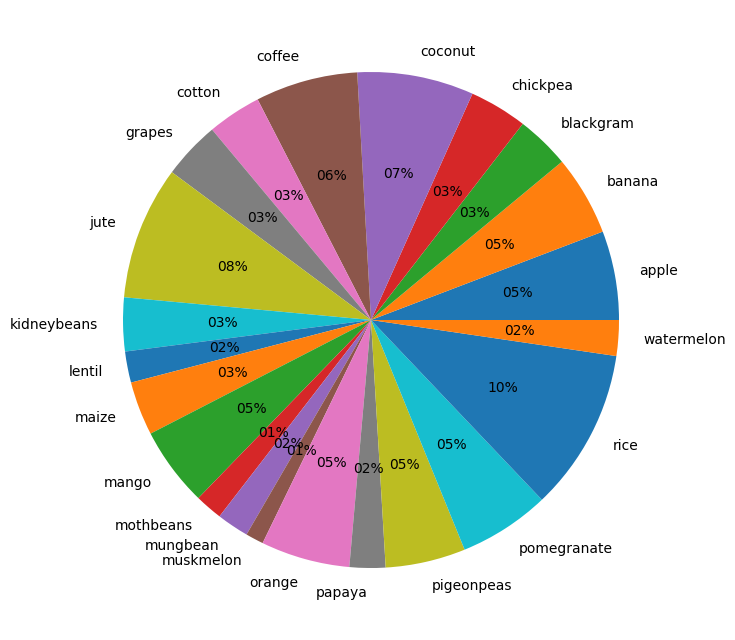

In [38]:
crops_label=list(rain['label'])
min_rain=list(rain['min_rain'])
plt.figure(figsize=(8,24))
plt.pie(min_rain,labels=crops_label,autopct="%2.2d%%")
plt.show()

In [39]:
x=df.drop('label',axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [40]:
x.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [41]:
x.duplicated().sum()

0

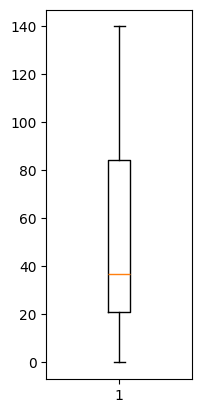

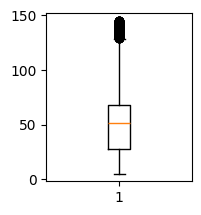

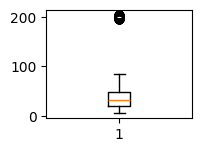

In [42]:
plt.subplot(1,3,3)
plt.boxplot(df['N'])
plt.show()

plt.subplot(2,3,3)
plt.boxplot(df['P'])
plt.show()

plt.subplot(3,3,3)
plt.boxplot(df['K'])
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer  

In [44]:
df['N'].std()   # Standard Deviation

36.9173338337566

In [45]:
df['N'].var()   # Varience

1362.88953739303

In [46]:
from sklearn.preprocessing import StandardScaler

# Assuming `x` is your input data
std = StandardScaler()  # Instantiate the scaler
x_transformed = std.fit_transform(x)  # Apply fit_transform on the data


In [47]:
x_transformed.shape

(2200, 7)

In [48]:
from sklearn.cluster import KMeans

In [49]:
kmeans=KMeans()
kmeans.fit(x_transformed)

KMeans()

In [50]:
kmeans.labels_

array([5, 5, 5, ..., 5, 0, 5])

In [51]:
df['cluster_no']=kmeans.labels_

In [52]:
df.head(101)

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,5
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,5
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,5
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,5
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,5
...,...,...,...,...,...,...,...,...,...
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice,5
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice,5
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice,5
99,65,37,40,23.359054,83.595123,5.333323,188.413665,rice,5


In [53]:
group_six=df[df['cluster_no']==6]
group_six

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
200,40,72,77,17.024985,16.988612,7.485996,88.551231,chickpea,6
201,23,72,84,19.020613,17.131591,6.920251,79.926981,chickpea,6
202,39,58,85,17.887765,15.405897,5.996932,68.549329,chickpea,6
203,22,72,85,18.868056,15.658092,6.391174,88.510490,chickpea,6
204,36,67,77,18.369526,19.563810,7.152811,79.263577,chickpea,6
...,...,...,...,...,...,...,...,...,...
298,40,58,75,18.591908,14.779596,7.168096,89.609825,chickpea,6
299,49,69,82,18.315615,15.361435,7.263119,81.787105,chickpea,6
314,12,78,23,16.065228,18.724797,5.998125,88.066388,kidneybeans,6
438,14,74,19,18.397591,36.826393,6.624966,93.123306,pigeonpeas,6


In [54]:
group_six['label'].unique()

array(['chickpea', 'kidneybeans', 'pigeonpeas'], dtype=object)

In [55]:
os.makedirs('models',exist_ok=True)
joblib.dump(kmeans,'./models/kmeans_model.lb')
joblib.dump(std,'./models/standardscaler.lb')

['./models/standardscaler.lb']

In [56]:
from sklearn.metrics import silhouette_score

In [57]:
# Silhouette range ->   -1 to 1
# 0 means performance is neutral.
# <0 means clustering is need to improve.
silhouette_score(x_transformed,kmeans.labels_)

0.3255505521645461

In [59]:
df['label','cluster_no'].to_csv('./models/filteringdata.csv',index=False)